<a href="https://colab.research.google.com/github/vvicky30/machine-learning/blob/supervised-ml/Heirarchial_agglomerative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
from scipy import ndimage
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
from matplotlib import pyplot as plt
from sklearn import manifold  ,datasets 
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets.samples_generator import make_blobs
%matplotlib inline 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
#generating the random data
'''
Generating Random Data
We will be generating a set of data using the make_blobs class.

Input these parameters into make_blobs:
n_samples: The total number of points equally divided among clusters.
Choose a number from 10-1500

centers: The number of centers to generate, or the fixed center locations.
Choose arrays of x,y coordinates for generating the centers. Have 1-10 centers (ex. centers=[[1,1], [2,5]])

cluster_std: The standard deviation of the clusters. The larger the number, the further apart the clusters
Choose a number between 0.5-1.5

Save the result to X1 and y1.
'''
X1,Y1=make_blobs(n_samples=50,centers=[[4,4], [-2, -1], [1, 1], [10,4]],cluster_std=0.9)

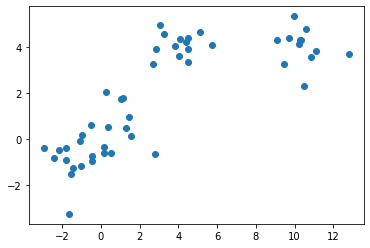

In [9]:
#ploot randomly generated datasets
plt.scatter(X1[:,0],X1[:,1],marker='o')

In [0]:
#set-up AgglomerativeClustering 
'''
The Agglomerative Clustering class will require two inputs:

n_clusters: The number of clusters to form as well as the number of centroids to generate.
Value will be: 4

linkage: Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.
Value can be: 'complete','short','average'
Note: It is recommended here.... i try everything with 'average' as well
'''
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'average')


In [12]:
agglom.fit(X1,Y1)#here i passed both feature samples and response samples ; 
#on basis of response samples several pairs of clusters are merged by average distance crieteria

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=4)

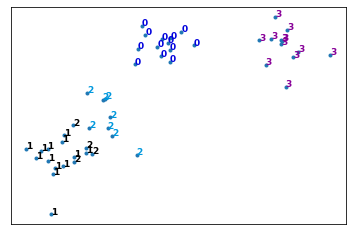

In [14]:
# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(6,4))

# These two lines of code are used to scale the data points down,
# Or else the data points will be scattered very far apart.

# Create a minimum and maximum range of X1.
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

# Get the average distance for X1.
X1 = (X1 - x_min) / (x_max - x_min)

# This loop displays all of the datapoints.
for i in range(X1.shape[0]):
    # Replace the data points with their respective cluster value 
    # (ex. 0) and is color coded with a colormap (plt.cm.spectral)
    plt.text(X1[i, 0], X1[i, 1], str(Y1[i]),
             color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})
    
# Remove the x ticks, y ticks, x and y axis
plt.xticks([])
plt.yticks([])
#plt.axis('off')



# Display the plot of the original data before clustering
plt.scatter(X1[:, 0], X1[:, 1], marker='.')
# Display the plot
plt.show()

In [17]:
dist_matrix=distance_matrix(X1,X1)
print(dist_matrix)

[[0.         0.36643313 0.73905467 ... 0.64077763 0.05578776 0.9228669 ]
 [0.36643313 0.         0.3731321  ... 0.28244116 0.33673584 0.58512862]
 [0.73905467 0.3731321  0.         ... 0.12042381 0.709547   0.29162327]
 ...
 [0.64077763 0.28244116 0.12042381 ... 0.         0.61656626 0.31208651]
 [0.05578776 0.33673584 0.709547   ... 0.61656626 0.         0.9071515 ]
 [0.9228669  0.58512862 0.29162327 ... 0.31208651 0.9071515  0.        ]]


# **Dendrogram Associated for the Agglomerative Hierarchical Clustering**
Remember that a distance matrix contains the distance from each point to every other point of a dataset .
Use the function distance_matrix, which requires two inputs. Use the Feature Matrix, X1 as both inputs and save the distance matrix to a variable called dist_matrix 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


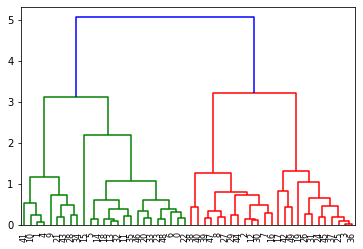

In [18]:
#Save the result to a variable called Z
Z = hierarchy.linkage(dist_matrix, 'complete')
'''A Hierarchical clustering is typically visualized as a dendrogram as shown in the following cell. 
Each merge is represented by a horizontal line. The y-coordinate of the horizontal line is the 
similarity of the two clusters that were merged, where cities are viewed as singleton clusters. 
By moving up from the bottom layer to the top node, 
a dendrogram allows us to reconstruct the history of merges that resulted in the depicted clustering.

Next, we will save the dendrogram to a variable called dendro. In doing this, 
the dendrogram will also be displayed. Using the dendrogram class from hierarchy, pass in the parameter:
Z'''
dendro = hierarchy.dendrogram(Z)

**clustering on vehicle dataset**

In [19]:
!wget -O cars_clus.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cars_clus.csv

--2020-03-20 07:27:04--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cars_clus.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17774 (17K) [text/csv]
Saving to: ‘cars_clus.csv’

cars_clus.csv       100%[===================>]  17.36K  --.-KB/s    in 0.01s   

2020-03-20 07:27:04 (1.48 MB/s) - ‘cars_clus.csv’ saved [17774/17774]



In [20]:
filename='cars_clus.csv'
#read csv
pdf=pd.read_csv(filename)
print("shape and size of dataset :",pdf.shape)
pdf.head(7)

shape and size of dataset : (159, 16)


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0
5,Audi,A6,18.780,23.555,0.000,33.950,2.800,200.000,108.700,76.100,192.000,3.561,18.500,22.000,2.933,0.0
6,Audi,A8,1.380,39.000,0.000,62.000,4.200,310.000,113.000,74.000,198.200,3.902,23.700,21.000,0.322,0.0


In [22]:
print ("Size of dataset before cleaning: ", pdf.size)
pdf[[ 'sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']] = pdf[['sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']].apply(pd.to_numeric, errors='coerce')
pdf = pdf.dropna()#Data Cleaning: lets simply clear the dataset by dropping the rows that have null value:
pdf = pdf.reset_index(drop=True)#for synchronizing the indexes with the fundamental's one....as due to the dropping null-rows 
print ("Shape of dataset after cleaning: ", pdf.size)
pdf.head(7)

Size of dataset before cleaning:  1872
Shape of dataset after cleaning:  1872


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0
5,Audi,A8,1.380,39.000,0.0,62.00,4.2,310.0,113.0,74.0,198.2,3.902,23.7,21.0,0.322,0.0
6,BMW,328i,9.231,28.675,0.0,33.40,2.8,193.0,107.3,68.5,176.0,3.197,16.6,24.0,2.223,0.0


In [0]:
#features selection
featureset = pdf[['engine_s',  'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']]

In [26]:
#Normalization
'''Now we can normalize the feature set. MinMaxScaler transforms features by scaling each feature to a given range. 
It is by default (0, 1). That is, this estimator scales and translates each feature individually 
such that it is between zero and one.
'''
from sklearn.preprocessing import MinMaxScaler
x = featureset.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]#showing first five rows

array([[0.11428571, 0.21518987, 0.18655098, 0.28143713, 0.30625832,
        0.2310559 , 0.13364055, 0.43333333],
       [0.31428571, 0.43037975, 0.3362256 , 0.46107784, 0.5792277 ,
        0.50372671, 0.31797235, 0.33333333],
       [0.35714286, 0.39240506, 0.47722343, 0.52694611, 0.62849534,
        0.60714286, 0.35483871, 0.23333333],
       [0.11428571, 0.24050633, 0.21691974, 0.33532934, 0.38082557,
        0.34254658, 0.28110599, 0.4       ],
       [0.25714286, 0.36708861, 0.34924078, 0.80838323, 0.56724368,
        0.5173913 , 0.37788018, 0.23333333]])

# **clustering using scipy** 
In agglomerative clustering, at each iteration, the algorithm must update the distance matrix to reflect the distance of the newly formed cluster with the remaining clusters in the forest. The following methods are supported in Scipy for calculating the distance between the newly formed cluster and each: - single - complete - average - weighted - centroid

We use complete for our case, but feel free to change it to see how the results change.

In [27]:
import scipy#here we using the scipy for clustering dataset by calculating the ditance matrix
leng = feature_mtx.shape[0]
D = scipy.zeros([leng,leng])#using zeros in place of undefined distance between one cities to the cities itself
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
import pylab
import scipy.cluster.hierarchy
Z = hierarchy.linkage(D, 'complete')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until


In [29]:
#Essentially, Hierarchical clustering does not require a pre-specified number of clusters. However,
 #in some applications:- 
#we want a partition of disjoint clusters just as in flat clustering. So you can use a cutting line:
from scipy.cluster.hierarchy import fcluster# here fcluster used for the flat-cluster 
max_d = 3
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([ 1,  5,  5,  6,  5,  4,  6,  5,  5,  5,  5,  5,  4,  4,  5,  1,  6,
        5,  5,  5,  4,  2, 11,  6,  6,  5,  6,  5,  1,  6,  6, 10,  9,  8,
        9,  3,  5,  1,  7,  6,  5,  3,  5,  3,  8,  7,  9,  2,  6,  6,  5,
        4,  2,  1,  6,  5,  2,  7,  5,  5,  5,  4,  4,  3,  2,  6,  6,  5,
        7,  4,  7,  6,  6,  5,  3,  5,  5,  6,  5,  4,  4,  1,  6,  5,  5,
        5,  6,  4,  5,  4,  1,  6,  5,  6,  6,  5,  5,  5,  7,  7,  7,  2,
        2,  1,  2,  6,  5,  1,  1,  1,  7,  8,  1,  1,  6,  1,  1],
      dtype=int32)

In [30]:
#Also, you can determine the number of clusters directly:

from scipy.cluster.hierarchy import fcluster
k = 5
clusters = fcluster(Z, k, criterion='maxclust')
clusters

array([1, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 1, 3, 3, 3, 3, 2, 1,
       5, 3, 3, 3, 3, 3, 1, 3, 3, 4, 4, 4, 4, 2, 3, 1, 3, 3, 3, 2, 3, 2,
       4, 3, 4, 1, 3, 3, 3, 2, 1, 1, 3, 3, 1, 3, 3, 3, 3, 2, 2, 2, 1, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 2, 1, 3, 3, 3, 3, 3, 2,
       3, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 1, 1, 1,
       3, 4, 1, 1, 3, 1, 1], dtype=int32)

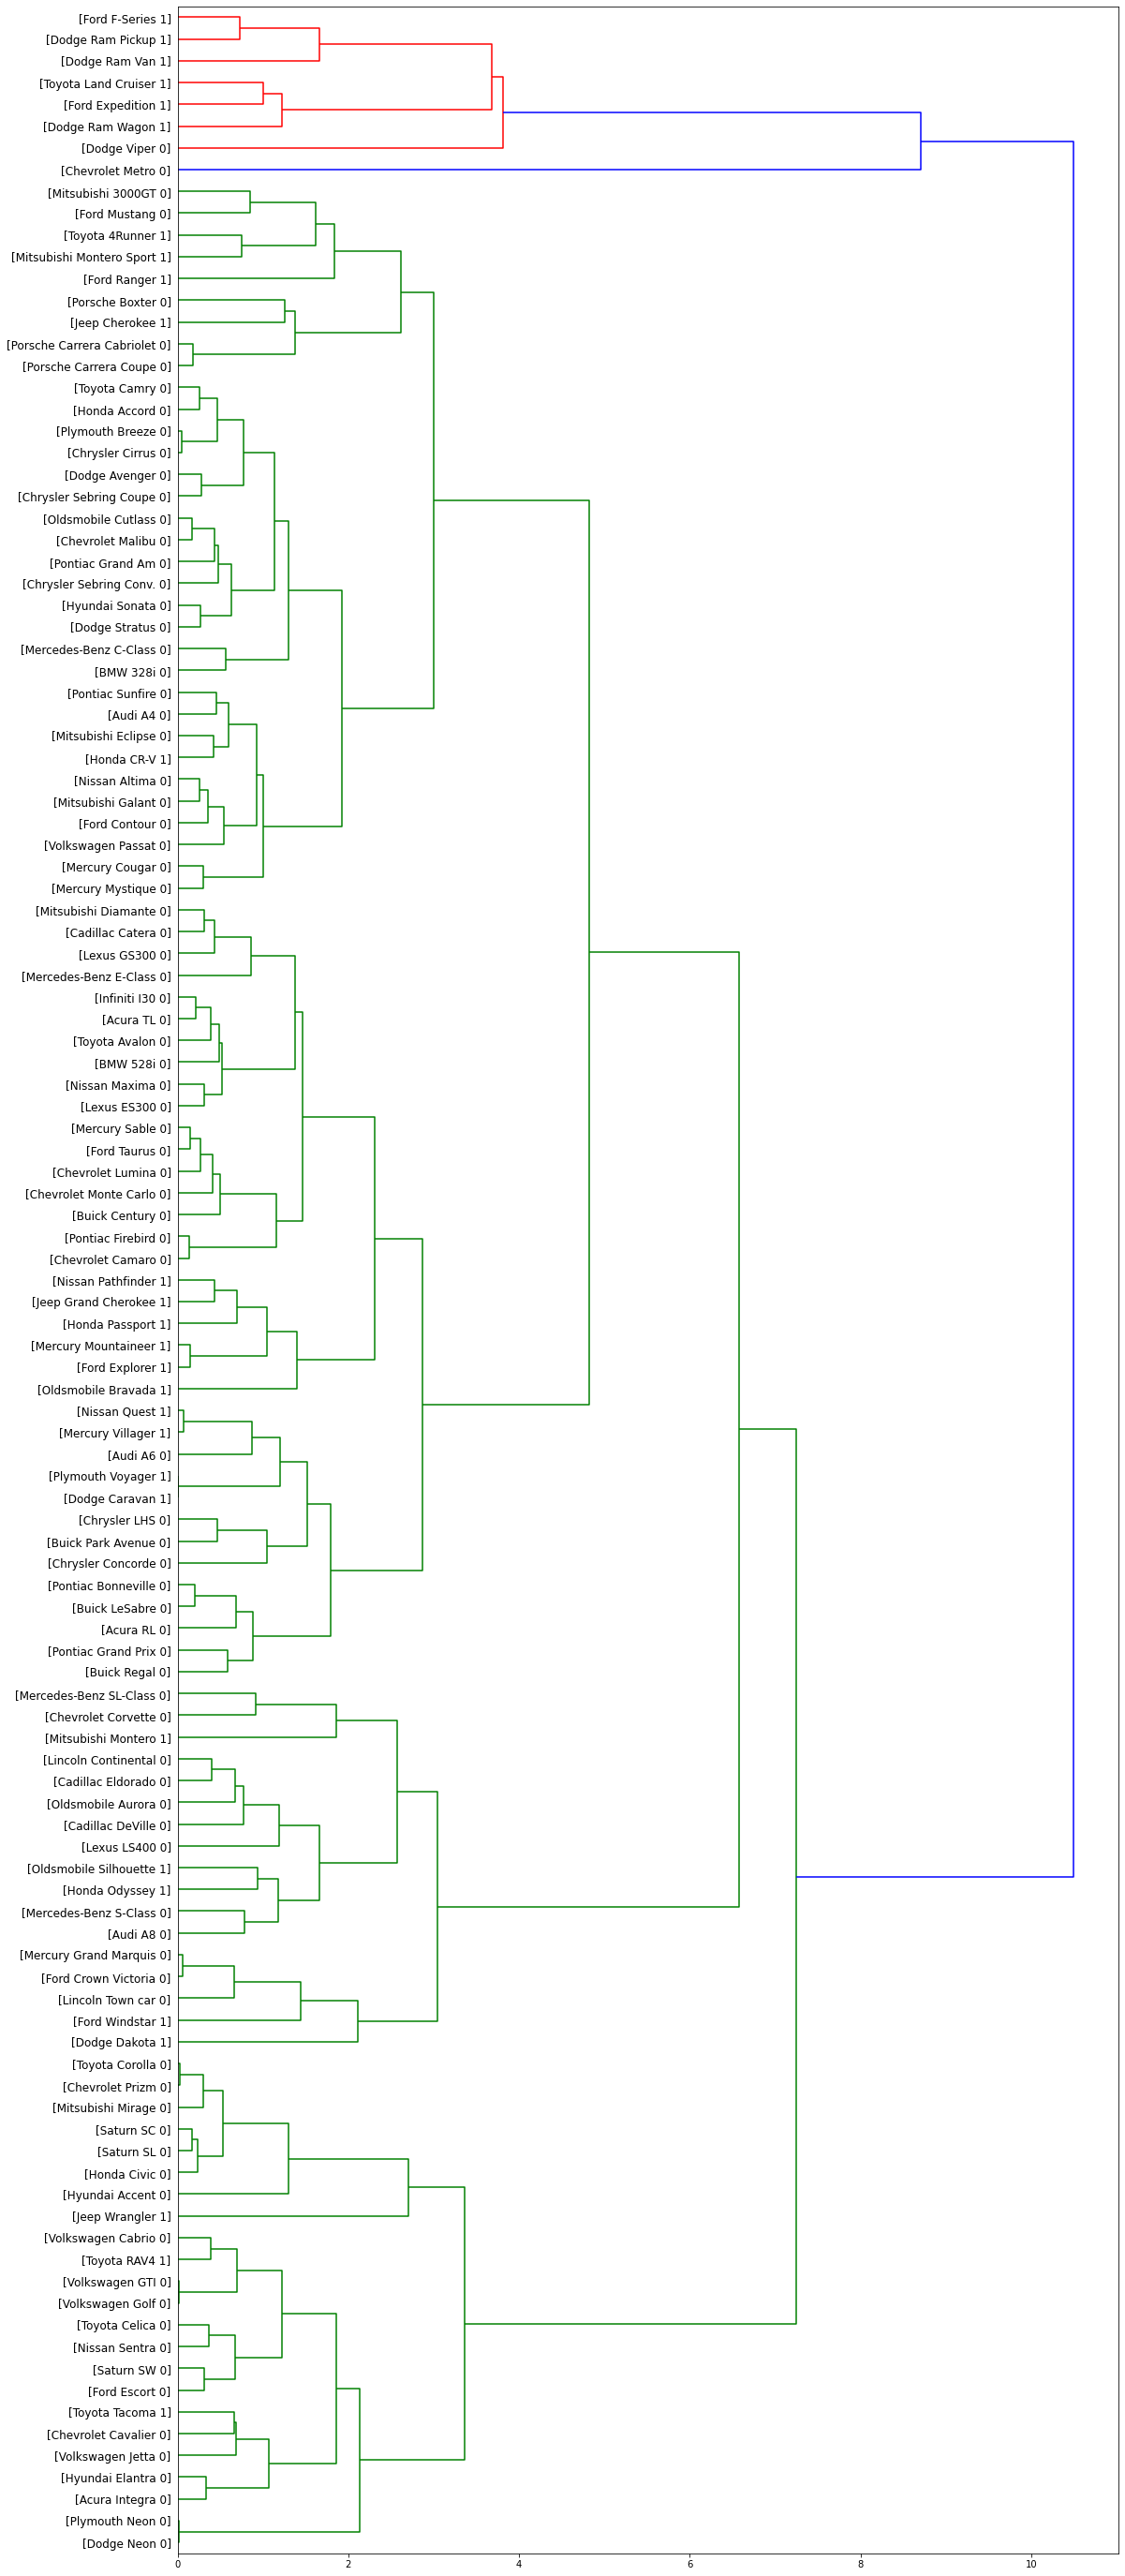

In [31]:
#now we plot dendogram here:
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (pdf['manufact'][id], pdf['model'][id], int(float(pdf['type'][id])) )
    
dendro = hierarchy.dendrogram(Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

In [32]:
#Clustering using scikit-learn
#Lets redo it again, but this time using scikit-learn package:
dist_matrix = distance_matrix(feature_mtx,feature_mtx) 
print(dist_matrix)

[[0.         0.57777143 0.75455727 ... 0.28530295 0.24917241 0.18879995]
 [0.57777143 0.         0.22798938 ... 0.36087756 0.66346677 0.62201282]
 [0.75455727 0.22798938 0.         ... 0.51727787 0.81786095 0.77930119]
 ...
 [0.28530295 0.36087756 0.51727787 ... 0.         0.41797928 0.35720492]
 [0.24917241 0.66346677 0.81786095 ... 0.41797928 0.         0.15212198]
 [0.18879995 0.62201282 0.77930119 ... 0.35720492 0.15212198 0.        ]]


In [33]:
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')
agglom.fit(feature_mtx)
agglom.labels_

array([1, 2, 2, 1, 2, 3, 1, 2, 2, 2, 2, 2, 3, 3, 2, 1, 1, 2, 2, 2, 5, 1,
       4, 1, 1, 2, 1, 2, 1, 1, 1, 5, 0, 0, 0, 3, 2, 1, 2, 1, 2, 3, 2, 3,
       0, 3, 0, 1, 1, 1, 2, 3, 1, 1, 1, 2, 1, 1, 2, 2, 2, 3, 3, 3, 1, 1,
       1, 2, 1, 2, 2, 1, 1, 2, 3, 2, 3, 1, 2, 3, 5, 1, 1, 2, 3, 2, 1, 3,
       2, 3, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       2, 0, 1, 1, 1, 1, 1])

In [34]:
#And, we can add a new field to our dataframe to show the cluster of each row:

pdf['cluster_'] = agglom.labels_
pdf.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,cluster_
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0,1
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0,2
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0,2
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0,1
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0,2


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

Text(0, 0.5, 'mpg')

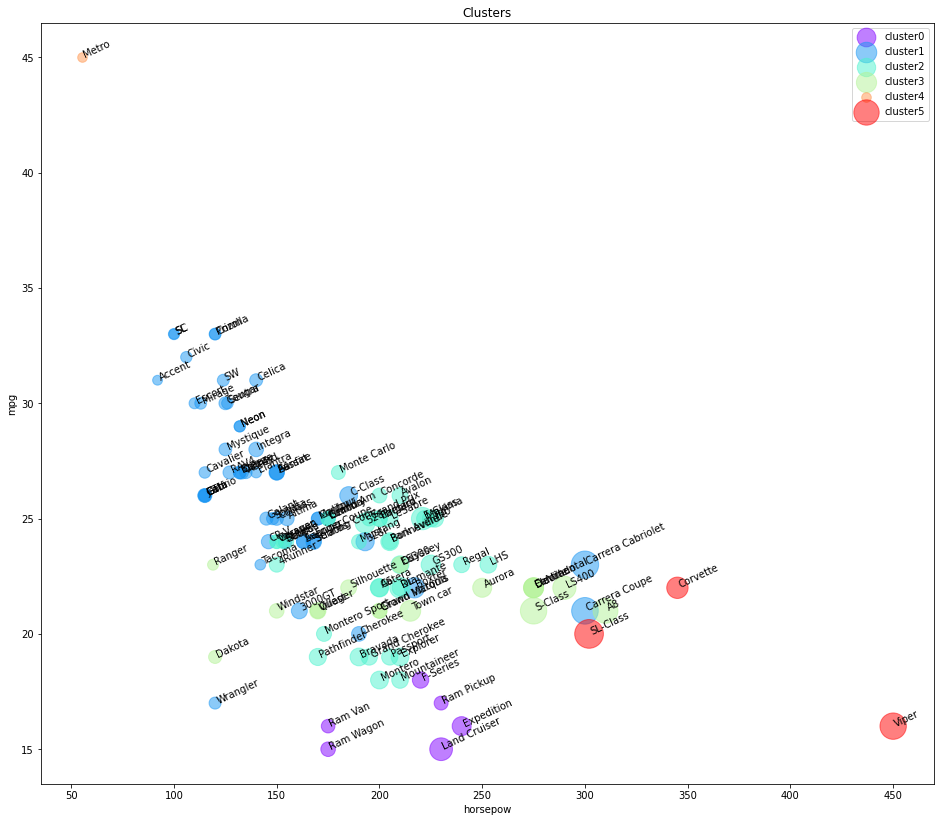

In [35]:
import matplotlib.cm as cm #for color mapping 
n_clusters = max(agglom.labels_)+1#maximum number from the agglom.labels_
colors = cm.rainbow(np.linspace(0, 1, n_clusters))#rainbow hue used here for the several coloring of clusters 
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = pdf[pdf.cluster_ == label]
    for i in subset.index:
            plt.text(subset.horsepow[i], subset.mpg[i],str(subset['model'][i]), rotation=25) 
    plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

In [36]:
#As you can see, we are seeing the distribution of each cluster using the scatter plot, 
#but it is not very clear where is the centroid of each cluster. 
#Moreover, there are 2 types of vehicles in our dataset, "truck" (value of 1 in the type column) and "car" (value of 1 in the type column).
# So, we use them to distinguish the classes, and summarize the cluster. 
#First we count the number of cases in each group:

pdf.groupby(['cluster_','type'])['cluster_'].count()
#Now we can look at the characteristics of each cluster:

agg_cars = pdf.groupby(['cluster_','type'])['horsepow','engine_s','mpg','price'].mean()
agg_cars

horsepow  engine_s        mpg      price
cluster_ type                                            
0        1.0   211.666667  4.483333  16.166667  29.024667
1        0.0   146.531915  2.246809  27.021277  20.306128
         1.0   145.000000  2.580000  22.200000  17.009200
2        0.0   203.111111  3.303704  24.214815  27.750593
         1.0   182.090909  3.345455  20.181818  26.265364
3        0.0   256.500000  4.410000  21.500000  42.870400
         1.0   160.571429  3.071429  21.428571  21.527714
4        0.0    55.000000  1.000000  45.000000   9.235000
5        0.0   365.666667  6.233333  19.333333  66.010000

# **It is obvious that we have 3 main clusters with the majority of vehicles in those.**

# Cars:

*Cluster 1*: with almost high mpg, and low in horsepower.

*Cluster 2*: with good mpg and horsepower, but higher price than average.

*Cluster 3*: with low mpg, high horsepower, highest price.

# Trucks:

Cluster 1: with almost highest mpg among trucks, and lowest in horsepower and price.

Cluster 2: with almost low mpg and medium horsepower, but higher price than average.

Cluster 3: with good mpg and horsepower, low price.

Please notice that we did not use type , and price of cars in the clustering process, but Hierarchical clustering could forge the clusters and discriminate them with quite high accuracy.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

Text(0, 0.5, 'mpg')

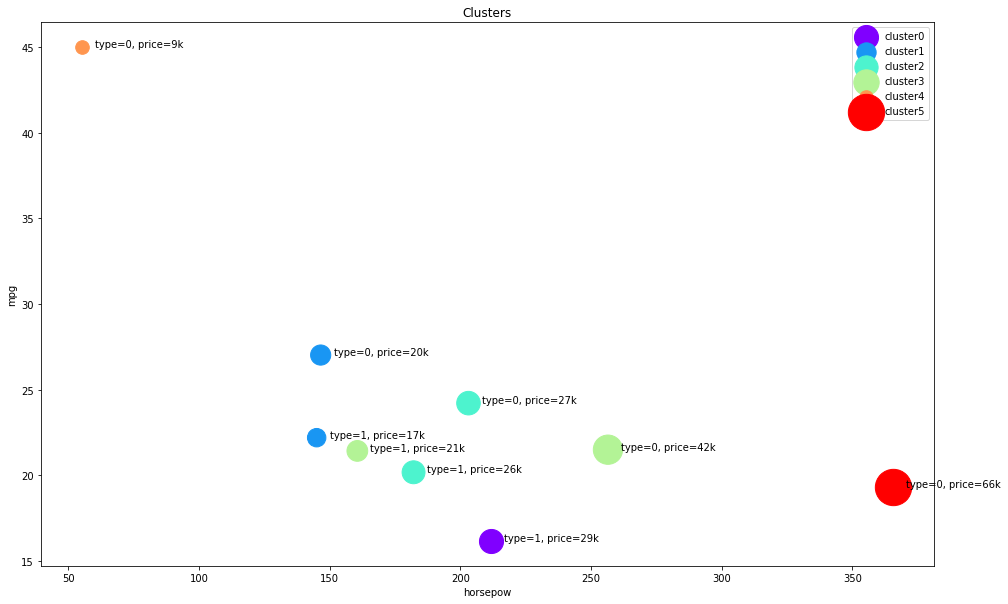

In [37]:
plt.figure(figsize=(16,10))
for color, label in zip(colors, cluster_labels):
    subset = agg_cars.loc[(label,),]
    for i in subset.index:
        plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3]))+'k')
    plt.scatter(subset.horsepow, subset.mpg, s=subset.price*20, c=color, label='cluster'+str(label))
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')
